# Проект: Исследование рынка стартапов для финансовой компании, работающей с венчурными инвестициями

## Введение


**Дата исследования**: 30 апреля 2025 года

Проект посвящен анализу стартапов, необходимому для разработки бизнес-модели финансовой компании с прицелом на покупку, развитие и последующую перепродажу перспективных проектов.

**Цели исследования:** 

1. Подготовить и проверить данные на соответствие здравому смыслу

2. Исследовать компании, которые были проданы за ноль или за один доллар при том, что у них был ненулевой общий объём финансирования

3. Распределеить стартапы по категориям и среди них выделить списки, характеризующиеся типично высокими ценами и наибольшим разбросом цен за стартап

4. Выявить и графически отобразить, сколько в среднем раундов финансирования проходило для стартапов из каждой группы

**План исследования:**

- Шаг 1. Знакомство с данными: загрузка и первичная предобработка

  1.1. Вывод общей информации, исправление названий столбцов

  1.2. Смена типов данных и анализ пропусков

- Шаг 2. Предобработка данных, предварительное исследование
  
  2.1. Раунды финансирования по годам
  
  2.2. Люди и их образование 
  
  2.3. Объединять или не объединять - вот в чем вопрос (пункт с решением по объединению датасетов)
  
  2.4. Проблемный датасет и прична возникновения пропусков.

- Шаг 3. Исследовательский анализ объединенных таблиц.
  
  3.1. Объединение данных
  
  3.2. Анализ выбросов
  
  3.3. Куплены забесплатно? Анализ компаний, проданных за ноль или один доллар
  
  3.4. Цены стартапов по категориям
  
  3.5. Сколько раундов продержится стартап перед покупкой

- Шаг 4. Итоговый вывод и рекомендации

**Описание данных:**

**Таблица acquisition** содержит информацию о покупках одними компаниями других компаний:

*id* — идентификатор покупки.

*acquiring_company_id* — идентификатор покупающей компании.

*acquired_company_id* — идентификатор покупаемой компании.

*term_code* — варианты расчёта.

*price_amount* — сумма сделки.

*acquired_at* — дата сделки.

**Таблица company_and_rounds** содержит информацию о компаниях и раундах финансирования:

*company ID* — идентификатор компании.

*name* — название компании.

*category code* — категория области деятельности компании.

*status* — статус компании.

*founded at* — дата инвестирования.

*closed at* — дата закрытия компании.

*domain* — официальный сайт компании.

*network username* — ник компании в сети.

*country code* — код страны компании.

*investment rounds* — число инвестиционных раундов.

*funding rounds* — число раундов финансирования.

*funding total* — сумма финансирования.

*milestones* — вехи финансирования.

*funding round id* — идентификатор этапа финансирования.

*company id* — идентификатор компании.

*funded at* — дата финансирования.

*funding round type* — тип финансирования.

*raised amount* — сумма финансирования.

*pre money valuation* — предварительная денежная оценка.

*participants* — число участников.

*is first round* — является ли раунд первым.

*is last round* — является раунд последним.

**Таблица education** содержит информацию об образовании сотрудника:

*id* — идентификатор записи об образовании.

*person_id* — идентификатор работника.

*instituition* — название учебного заведения.

*graduated_at* — дата получения образования.

**Таблица people** содержит информацию о сотрудниках:

*id* — идентификатор сотрудника.

*first_name* — имя сотрудника.

*last_name* — фамилия сотрудника.

*company_id* — идентификатор компании.

*network_username* — ник в социальных сетях.

**Таблица degrees** содержит информацию о типе образования сотрудника:

*id* — идентификатор записи.

*object_id* — идентификатор сотрудника.

*degree_type* — тип образования.

*subject* — специальность.

Также существуют таблицы, которые не требуются в данном проекте, но связанные с исследуемыми данными:

**Таблица fund** содержит информацию о фондах:

*id* — идентификатор фонда.

*name* — название фонда.

*category_code* — категория области деятельности компании.

*founded_at* — дата создания фонда.

*domain* — сайт фонда.

*network_username* — ник фонда в сети.

*country_code* — код страны фонда.

*investment_rounds* — число инвестиционных раундов.

*invested_companies* — число профинансированных компаний.

*milestones* — вехи финансирования.

**Таблица investment** содержит информацию о раундах инвестирования:

*id* — идентификатор этапа инвестирования.

*funding_round_id* — идентификатор раунда инвестирования.

*company_id* — индентификатор компании.

*funding_round_type* — тип финансирования.

*fund_id* — идентификатор фонда.


## Шаг 1. Знакомство с данными: загрузка и первичная предобработка

### 1.1. Вывод общей информации, исправление названия столбцов


In [1]:
# Импортируем бибилотеки для дальнейшей работы
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
!pip install phik
from phik import phik_matrix

In [2]:
# Загружаем данные в переменные
acquisition = pd.read_csv('https://code.s3.yandex.net/datasets/acquisition.csv') # информация о покупке одиними компаниями других компаний
company_and_rounds = pd.read_csv('https://code.s3.yandex.net/datasets/company_and_rounds.csv') # информация о компаниях и раундах финансирования
people = pd.read_csv('https://code.s3.yandex.net/datasets/people.csv') # информация о сотрудниках
education = pd.read_csv('https://code.s3.yandex.net/datasets/education.csv') # информация об образовании сотрудников
degrees = pd.read_csv('https://code.s3.yandex.net/datasets/degrees.csv') # информация о типе образования сотрудника
fund = pd.read_csv('https://code.s3.yandex.net/datasets/fund.csv') # опциональный датасет: информация о фондах
investment = pd.read_csv('https://code.s3.yandex.net/datasets/investment.csv') # опциональный датасет: информация о раундах инвестирования

In [3]:
# Проверим названия столбцов в каждом из датафреймов
display('acquisition:', acquisition.columns)
display('company_and_rounds:', company_and_rounds.columns)
display('people:', people.columns)
display('education:', education.columns)
display('degrees:', degrees.columns)
display('fund:', fund.columns)
display('investment:', investment.columns)

'acquisition:'

Index(['id', 'acquiring_company_id', 'acquired_company_id', 'term_code',
       'price_amount', 'acquired_at'],
      dtype='object')

'company_and_rounds:'

Index(['company  ID', 'name', 'category  code', 'status', 'founded  at',
       'closed  at', 'domain', 'network  username', 'country  code',
       'investment  rounds', 'funding  rounds', 'funding  total', 'milestones',
       'funding  round  id', 'company  id', 'funded  at',
       'funding  round  type', 'raised  amount', 'pre  money  valuation',
       'participants', 'is  first  round', 'is  last  round'],
      dtype='object')

'people:'

Index(['id', 'first_name', 'last_name', 'company_id', 'network_username'], dtype='object')

'education:'

Index(['id', 'person_id', 'instituition', 'graduated_at'], dtype='object')

'degrees:'

Index(['id', 'object_id', 'degree_type', 'subject'], dtype='object')

'fund:'

Index(['id', 'name', 'founded_at', 'domain', 'network_username',
       'country_code', 'investment_rounds', 'invested_companies',
       'milestones'],
      dtype='object')

'investment:'

Index(['id', 'funding_round_id', 'company_id', 'fund_id'], dtype='object')

Мы видим, что в датасете *company_and_rounds* стиль названий столбцов отличается от стилей в остальных датасетов отсутствием нижних подчеркиваний между словами.

In [4]:
# Приведем названия столбцов в датасете *company_and_rounds* к стандарту snake_case, как в других датасетах и проверим результат
company_and_rounds.columns = [col.strip().replace('  ', ' ').replace(' ', '_').lower() for col in company_and_rounds.columns]
display(company_and_rounds.columns)

Index(['company_id', 'name', 'category_code', 'status', 'founded_at',
       'closed_at', 'domain', 'network_username', 'country_code',
       'investment_rounds', 'funding_rounds', 'funding_total', 'milestones',
       'funding_round_id', 'company_id', 'funded_at', 'funding_round_type',
       'raised_amount', 'pre_money_valuation', 'participants',
       'is_first_round', 'is_last_round'],
      dtype='object')

Поскольку одно из наименований - *company_id* - есть сразу у двух столбцов в этой таблице, пререименуем один из них, чтобы избежать путаницы в дальнейшем. По смыслу эти столбцы должны означать одно и то же, но следует проверить в дальнейшем их наполнение.

In [5]:
# Переименуем второй столбец company_id и проверим результат
columns = company_and_rounds.columns.tolist()
columns[14] = 'company_id_funding'
company_and_rounds.columns = columns
display(company_and_rounds.columns)

Index(['company_id', 'name', 'category_code', 'status', 'founded_at',
       'closed_at', 'domain', 'network_username', 'country_code',
       'investment_rounds', 'funding_rounds', 'funding_total', 'milestones',
       'funding_round_id', 'company_id_funding', 'funded_at',
       'funding_round_type', 'raised_amount', 'pre_money_valuation',
       'participants', 'is_first_round', 'is_last_round'],
      dtype='object')

In [6]:
# Выведем первые строки датафрейма acquisition на экран
acquisition.head()

,id,acquiring_company_id,acquired_company_id,term_code,price_amount,acquired_at
0,1,11,10,NaN,20000000,2007-05-30
1,7,59,72,cash,60000000,2007-07-01
2,8,24,132,cash,280000000,2007-05-01
3,9,59,155,cash,100000000,2007-06-01
4,10,212,215,cash,25000000,2007-07-01


In [7]:
# Выведем первые строки датафрейма company_and_rounds на экран
company_and_rounds.head()

,company_id,name,category_code,status,founded_at,closed_at,domain,network_username,country_code,investment_rounds,...,milestones,funding_round_id,company_id_funding,funded_at,funding_round_type,raised_amount,pre_money_valuation,participants,is_first_round,is_last_round
0,1.0,Wetpaint,web,operating,2005-10-17,NaN,wetpaint-inc.com,BachelrWetpaint,USA,0.0,...,5.0,888.0,1.0,2005-10-01,series-a,5250000.0,0.0,2.0,0.0,1.0
1,1.0,Wetpaint,web,operating,2005-10-17,NaN,wetpaint-inc.com,BachelrWetpaint,USA,0.0,...,5.0,889.0,1.0,2007-01-01,series-b,9500000.0,0.0,3.0,0.0,0.0
2,1.0,Wetpaint,web,operating,2005-10-17,NaN,wetpaint-inc.com,BachelrWetpaint,USA,0.0,...,5.0,2312.0,1.0,2008-05-19,series-c+,25000000.0,0.0,4.0,1.0,0.0
3,10.0,Flektor,games_video,acquired,NaN,NaN,flektor.com,NaN,USA,0.0,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,100.0,There,games_video,acquired,NaN,NaN,there.com,NaN,USA,0.0,...,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
# Выведем первые строки датафрейма people на экран
people.head()

,id,first_name,last_name,company_id,network_username
0,10,Mark,Zuckerberg,5.0,NaN
1,100,Peter,Lester,27.0,NaN
2,1000,Dr. Steven,E. Saunders,292.0,NaN
3,10000,Neil,Capel,2526.0,NaN
4,100000,Sue,Pilsch,NaN,NaN


In [9]:
# Выведем первые строки датафрейма education на экран
education.head()

,id,person_id,instituition,graduated_at
0,1,6117,NaN,NaN
1,2,6136,"Washington University, St. Louis",1990-01-01
2,3,6136,Boston University,1992-01-01
3,4,6005,University of Greenwich,2006-01-01
4,5,5832,Rice University,NaN


In [10]:
# Выведем первые строки датафрейма degrees на экран
degrees.head()

,id,object_id,degree_type,subject
0,1,p:6117,MBA,NaN
1,2,p:6136,BA,"English, French"
2,3,p:6136,MS,Mass Communication
3,4,p:6005,MS,Internet Technology
4,5,p:5832,BCS,"Computer Science, Psychology"


In [11]:
# Выведем первые строки датафрейма fund на экран
fund.head()

,id,name,founded_at,domain,network_username,country_code,investment_rounds,invested_companies,milestones
0,13131,NaN,NaN,NaN,NaN,NaN,0,0,0
1,1,Greylock Partners,1965-01-01,greylock.com,greylockvc,USA,307,196,0
2,10,Mission Ventures,1996-01-01,missionventures.com,NaN,USA,58,33,0
3,100,"Kapor Enterprises, Inc.",NaN,kei.com,NaN,USA,2,1,0
4,1000,Speed Ventures,NaN,NaN,NaN,NaN,0,0,1


In [12]:
# Выведем первые строки датафрейма investment на экран
investment.head()

,id,funding_round_id,company_id,fund_id
0,1,1,4,1
1,2,1,4,2
2,3,3,5,4
3,4,4,5,1
4,5,4,5,5


In [13]:
# Выведем информацию о каждом из датафреймов
display('acquisition:')
acquisition.info()
display('company_and_rounds:')
company_and_rounds.info()
display('people:')
people.info()
display('education:')
education.info()
display('degrees:')
degrees.info()
display('fund:')
fund.info()
display('investment:')
investment.info()

'acquisition:'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9407 entries, 0 to 9406
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   id                    9407 non-null   int64 
 1   acquiring_company_id  9407 non-null   int64 
 2   acquired_company_id   9407 non-null   int64 
 3   term_code             1831 non-null   object
 4   price_amount          9407 non-null   int64 
 5   acquired_at           9378 non-null   object
dtypes: int64(4), object(2)
memory usage: 441.1+ KB


'company_and_rounds:'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 217774 entries, 0 to 217773
Data columns (total 22 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   company_id           217472 non-null  float64
 1   name                 217472 non-null  object 
 2   category_code        143886 non-null  object 
 3   status               217472 non-null  object 
 4   founded_at           109956 non-null  object 
 5   closed_at            3449 non-null    object 
 6   domain               147159 non-null  object 
 7   network_username     95534 non-null   object 
 8   country_code         108607 non-null  object 
 9   investment_rounds    217472 non-null  float64
 10  funding_rounds       217472 non-null  float64
 11  funding_total        217472 non-null  float64
 12  milestones           217472 non-null  float64
 13  funding_round_id     52928 non-null   float64
 14  company_id_funding   52928 non-null   float64
 15  funded_at        

'people:'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 226709 entries, 0 to 226708
Data columns (total 5 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   id                226709 non-null  int64  
 1   first_name        226704 non-null  object 
 2   last_name         226708 non-null  object 
 3   company_id        34615 non-null   float64
 4   network_username  38867 non-null   object 
dtypes: float64(1), int64(1), object(3)
memory usage: 8.6+ MB


'education:'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109610 entries, 0 to 109609
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            109610 non-null  int64 
 1   person_id     109610 non-null  int64 
 2   instituition  109555 non-null  object
 3   graduated_at  58054 non-null   object
dtypes: int64(2), object(2)
memory usage: 3.3+ MB


'degrees:'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109610 entries, 0 to 109609
Data columns (total 4 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   id           109610 non-null  int64 
 1   object_id    109610 non-null  object
 2   degree_type  98392 non-null   object
 3   subject      81298 non-null   object
dtypes: int64(1), object(3)
memory usage: 3.3+ MB


'fund:'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11652 entries, 0 to 11651
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   id                  11652 non-null  int64 
 1   name                11650 non-null  object
 2   founded_at          4605 non-null   object
 3   domain              7362 non-null   object
 4   network_username    2149 non-null   object
 5   country_code        7053 non-null   object
 6   investment_rounds   11652 non-null  int64 
 7   invested_companies  11652 non-null  int64 
 8   milestones          11652 non-null  int64 
dtypes: int64(4), object(5)
memory usage: 819.4+ KB


'investment:'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61403 entries, 0 to 61402
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   id                61403 non-null  int64
 1   funding_round_id  61403 non-null  int64
 2   company_id        61403 non-null  int64
 3   fund_id           61403 non-null  int64
dtypes: int64(4)
memory usage: 1.9 MB


Мы познакомились с основными данными по таблицам. В результате удалось установить, что стиль названий столбцов в таблице **company_and_rounds.csv**. Там же были выявлены 2 столбца с одинаковыми названиями - у одного из них произвели замену, чтобы избежать путаницу при дальнейшем анализе.

При знакомстве с содержанием столбцов удалось определить, что их наполнение соответствует по смыслу названиям. При этом в каждой таблице, за исключением **investment.csv**, присутствует минимум один столбец с пропусками, что может повлиять на результаты исследования. Детально рассмотрим пропуски на следуюзем шаге.

### 1.2. Смена типов и анализ пропусков


Исходя из раскрытой информации о датасетах, есть ряд столбцов, в которых необходимо поменять тип с object на datetime, а именно:

датасет *acquisition*: acquired_at

датасет *company_and_rounds*: founded_at, closed_at, funded_at

датасет *education*: graduated_at

датасет *fund*: founded_at

In [14]:
# Преобразование столбцов с датами в формат datetime
# acquisition
acquisition['acquired_at'] = pd.to_datetime(acquisition['acquired_at'], errors='coerce')

# company_and_rounds
company_and_rounds['founded_at'] = pd.to_datetime(company_and_rounds['founded_at'], errors='coerce')
company_and_rounds['closed_at'] = pd.to_datetime(company_and_rounds['closed_at'], errors='coerce')
company_and_rounds['funded_at'] = pd.to_datetime(company_and_rounds['funded_at'], errors='coerce')

# education
education['graduated_at'] = pd.to_datetime(education['graduated_at'], errors='coerce')

# fund
fund['founded_at'] = pd.to_datetime(fund['founded_at'], errors='coerce')

In [15]:
# Проверим типы данных после преобразований
display("acquisition types:", acquisition.dtypes)
display("company_and_rounds types:", company_and_rounds.dtypes)
display("education types:", education.dtypes)
display("fund types:", fund.dtypes)

'acquisition types:'

id                               int64
acquiring_company_id             int64
acquired_company_id              int64
term_code                       object
price_amount                     int64
acquired_at             datetime64[ns]
dtype: object

'company_and_rounds types:'

company_id                    float64
name                           object
category_code                  object
status                         object
founded_at             datetime64[ns]
closed_at              datetime64[ns]
domain                         object
network_username               object
country_code                   object
investment_rounds             float64
funding_rounds                float64
funding_total                 float64
milestones                    float64
funding_round_id              float64
company_id_funding            float64
funded_at              datetime64[ns]
funding_round_type             object
raised_amount                 float64
pre_money_valuation           float64
participants                  float64
is_first_round                float64
is_last_round                 float64
dtype: object

'education types:'

id                       int64
person_id                int64
instituition            object
graduated_at    datetime64[ns]
dtype: object

'fund types:'

id                             int64
name                          object
founded_at            datetime64[ns]
domain                        object
network_username              object
country_code                  object
investment_rounds              int64
invested_companies             int64
milestones                     int64
dtype: object

In [16]:
# Выведем доли пропущенных значений в каждой из таблиц

# Список датафреймов
dataframes = {
    'acquisition': acquisition,
    'company_and_rounds': company_and_rounds,
    'people': people,
    'education': education,
    'degrees': degrees,
    'fund': fund,
    'investment': investment
}

# Вывод доли пропущенных значений для каждого датафрейма
for name, df in dataframes.items():
    display(f"Пропущенные значения в {name}:")
    missing = df.isnull().mean() * 100  # Доля пропусков в процентах
    display(missing[missing > 0])  # Вывод только столбцов с пропусками

'Пропущенные значения в acquisition:'

term_code      80.535771
acquired_at     0.308281
dtype: float64

'Пропущенные значения в company_and_rounds:'

company_id              0.138676
name                    0.138676
category_code          33.928752
status                  0.138676
founded_at             49.509124
closed_at              98.416248
domain                 32.425818
network_username       56.131586
country_code           50.128574
investment_rounds       0.138676
funding_rounds          0.138676
funding_total           0.138676
milestones              0.138676
funding_round_id       75.695905
company_id_funding     75.695905
funded_at              75.809784
funding_round_type     75.695905
raised_amount          75.695905
pre_money_valuation    75.695905
participants           75.695905
is_first_round         75.695905
is_last_round          75.695905
dtype: float64

'Пропущенные значения в people:'

first_name           0.002205
last_name            0.000441
company_id          84.731528
network_username    82.855996
dtype: float64

'Пропущенные значения в education:'

instituition     0.050178
graduated_at    47.035854
dtype: float64

'Пропущенные значения в degrees:'

degree_type    10.234468
subject        25.829760
dtype: float64

'Пропущенные значения в fund:'

name                 0.017164
founded_at          60.478888
domain              36.817714
network_username    81.556814
country_code        39.469619
dtype: float64

'Пропущенные значения в investment:'

Series([], dtype: float64)

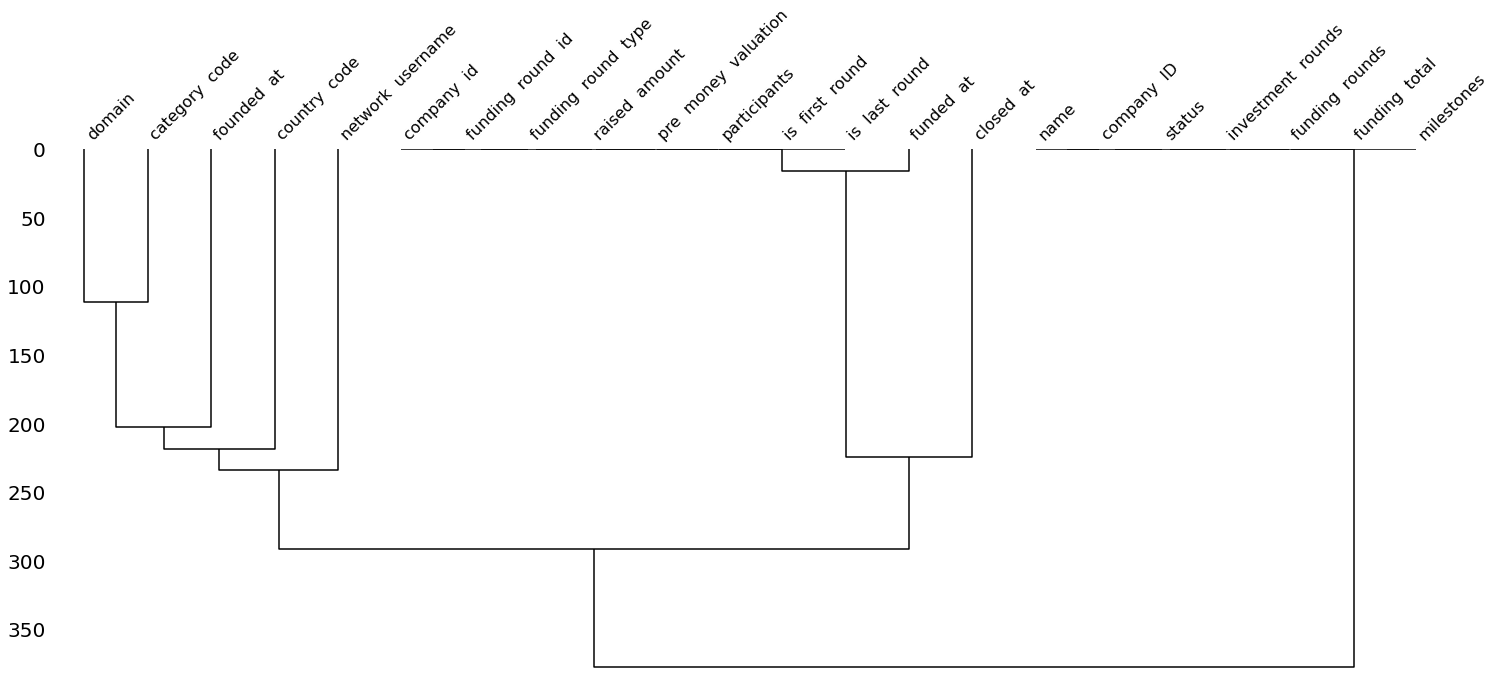

In [17]:
# Код ревьюера
# Метод dendrogram из библиотеки missingno
!pip install missingno -q
import missingno as msno
df_company_and_rounds_12 = pd.read_csv(r'https://code.s3.yandex.net/datasets/company_and_rounds.csv')
msno.dendrogram(df_company_and_rounds_12)
plt.show()

В таблице **acquisition** пропуски представлены в 2 столбцах: *term_code* (доля пропусков более 80%) и *acquired_at* (менее 1% пропусков). Пропуски в *term_code* потенциально могут ограничить возможности анализа условий сделок, но анализу остальных столбцов препятствий нет.

В таблице **company_and_rounds** в столбцах *funding_round_id*, *company_id* (второй из двух), *funded_at*, *funding_round_type*, *raised_amount*, *pre_money_valuation*, *participants*, *is_first_round*, *is_last_round* содержат по 75,7% пропусков. Это говорит о том, что данные о финансировании доступны только для части компаний, что может ограничить анализ инвестиционной активности. В этой же таблице значительные пропуски присутствуют в столбцах *category_code* (33.9%), *founded_at* (49.5%), *country_code* (50.1%) и *network_username* (56.1%), и это может затруднить анализ по категориям, географии и истории компаний. 98,4% пропусков присутствуют в столбце *closed_at*, однако этот результат можно считать ожидаемым, поскольку большинство компаний, скорее всего, не закрыты. В остальных столбцах также присутствуют пропуски, но их объем незначительный.

В таблице **people** доля пропусков в столбцах *company_id* и *network_username* превышает 80%. Это может затруднить анализ персонала компаний. Несмотря на то, что в столбцах с именами и фамилиями сотрудников пропусков очень мало, существует вероятность, что эти данные окажутся малоинформативными из-за нехватки id.

В таблице **education** 47% пропусков в столбце *graduated_at* - это способно ограничить возможности анализа временных характеристик образования. В столбце *instituition* лишь 0,05% пропусков, в остальных столбцах пропусков нет совсем - это позволяет проанализировать учебные заведения сотрудников.

В таблице **degrees** умеренные пропуски в *degree_type* (10,2%) и *subject* (25,8%) могут ограничить детальный анализ типов образования и специальностей, но данные по object_id полные, что позволяет связывать записи с сотрудниками.

В таблице **fund** высокий уровень пропусков в столбцах *founded_at* (60.5%), *network_username* (81.6%), и *country_code* (39.5%). Потенциально это ограничивает анализ фондов. Но полные данные по *id*, *investment_rounds*, и *invested_companies* позволяют анализировать инвестиционную активность фондов.

В таблице **investment** пропусков нет.

**ПРОМЕЖУТОЧНЫЕ ИТОГИ**

1. В таблице *company_and_rounds* названия столбцов были приведены к единому стилю с остальными таблицами - snake_case

2. Также обращаем внимание, что в той же таблице содержится два столбца с одинаковым названием - company_id. В одном из них содержится значительный объем пропусков. Предположительно, один столбец можно оставить, а второй - удалить

3. Столбцы в таблицах, содержащие информацию о датах и времени, приведены к соответствующему типу данных datetime

4. Проведен анализ пропусков. Выявлены как незначительные объемы пропусков, так и серьезные недостатки данных, особенно в таблице education, что может затруднить проведение дальнейшего исследовательского анализа

## Шаг 2. Предобработка данных, предварительное исследование


### 2.1. Раунды финансирования по годам

In [18]:
# В рамках подготовки данных извлекаем год из столбца funded_at
company_and_rounds['year'] = company_and_rounds['funded_at'].dt.year

In [19]:
# Отфильтруем строки с заполненными столбцами raised_amount и funded_at
data = company_and_rounds.dropna(subset=['raised_amount', 'funded_at'])

In [20]:
# Создаем сводную таблицу по годам, в которой для каждого года указаны типичный размер средств в рамках одного раунда и общее количество раундов финансирования за год
pivot_table = data.groupby('year').agg(
    median_raised_amount=('raised_amount', 'median'),  # Медиана raised_amount
    total_rounds=('raised_amount', 'count')           # Количество раундов
).reset_index()

In [21]:
# Отфильтруем таблицу так, чтобы осталась информация только для тех лет, для которых есть данные о более чем 50 раундах финансирования
pivot_table=pivot_table[pivot_table['total_rounds']>50]

In [22]:
# Выводим сводную таблицу
display('Сводная таблица по годам (более 50 раундов финансирования)')
display(pivot_table)

'Сводная таблица по годам (более 50 раундов финансирования)'

,year,median_raised_amount,total_rounds
15,1999.0,2000000.0,76
16,2000.0,4200000.0,125
17,2001.0,3000000.0,96
18,2002.0,4200000.0,116
19,2003.0,3000000.0,159
20,2004.0,5000000.0,291
21,2005.0,5500000.0,1633
22,2006.0,5000000.0,2436
23,2007.0,3973320.0,3279
24,2008.0,3110000.0,3774


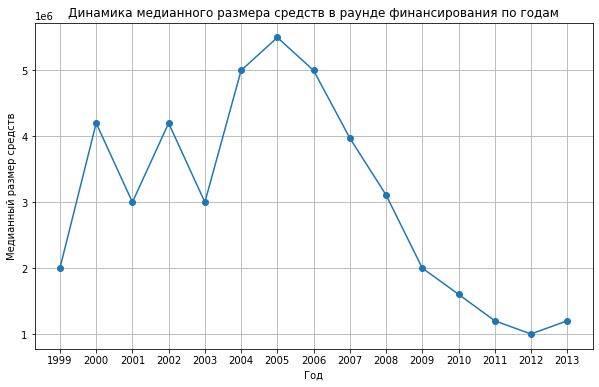

In [23]:
# График, на котором отражена динамика типичного размера средств, которые стартапы получали в рамках одного раунда финансирования
plt.figure(figsize=(10, 6))
plt.plot(pivot_table['year'], pivot_table['median_raised_amount'], marker='o')
plt.title('Динамика медианного размера средств в раунде финансирования по годам')
plt.xlabel('Год')
plt.ylabel('Медианный размер средств')
plt.grid(True)
plt.xticks(pivot_table['year'].astype(int))  # Отметим целые годы на оси X
plt.show()

Полученные данные позволяют дать ответы на 2 вопроса:

1. Типичный размер собранных в рамках одного раунда средств оказался максимальным в 2005 году - причем с тех пор вплоть до 2012 года включительно этот размер снижался.

2. В 2013 году количество выделяемых в рамках каждого раунда средств составило 1 200 000 единиц валюты, а общее количество раундов - 11 072. Оба показателя, по сравнению с предыдущим годом, демонстрируют рост, причем, если размер средств не достиг максимума за период наблюдений, то количество раундов стало рекордным за все прошедшее время.


### 2.2. Люди и их образование

На основе проведенного ранее анализа можно сделать вывод, что полнота информации об образовании определяется наличием записей в **education.csv** для сотрудников из таблицы **people.csv**. То есть, сотрудник считается без информации об образовании, если его *id* из **people.csv** отсутствует в столбце *person_id* в **education.csv**. 

In [24]:
# Выполним объединение таблиц people.csv и education.csv, чтобы проверить, есть ли запись об образовании для каждого сотрудника
merged = people.merge(education, left_on='id', right_on='person_id', how='left')

In [25]:
# Подсчитаем количество сотрудников без информации об образовании и выведем результат
no_education=merged['instituition'].isna()
total_employees=len(merged)
employees_no_education=no_education.sum()
fraction_no_education=employees_no_education/total_employees

display(f"Общее количество сотрудников: {total_employees}")
display(f"Количество сотрудников без информации об образовании: {employees_no_education}")
display(f"Доля сотрудников без информации об образовании: {fraction_no_education:.2%}")

'Общее количество сотрудников: 267694'

'Количество сотрудников без информации об образовании: 158692'

'Доля сотрудников без информации об образовании: 59.28%'

In [26]:
# Подсчитаем количество сотрудников в каждой компании - по столбцу company_id в таблице people.csv. При этом фильтруем данные так, чтобы в company_id были внесены данные
employee_counts = people[people['company_id'].notna()].groupby('company_id').size().reset_index(name='employee_count')
display("Описательная статистика количества сотрудников в компаниях:")
display(employee_counts['employee_count'].describe())

'Описательная статистика количества сотрудников в компаниях:'

count    22922.000000
mean         1.510121
std          2.764321
min          1.000000
25%          1.000000
50%          1.000000
75%          1.000000
max        244.000000
Name: employee_count, dtype: float64

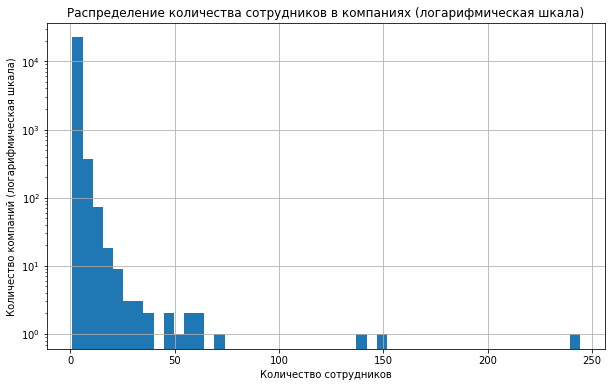

In [27]:
# Построим для наглядности гистограмму 
plt.figure(figsize=(10, 6))
plt.hist(employee_counts['employee_count'], bins=50, log=True)
plt.title('Распределение количества сотрудников в компаниях (логарифмическая шкала)')
plt.xlabel('Количество сотрудников')
plt.ylabel('Количество компаний (логарифмическая шкала)')
plt.grid(True)
plt.show()

На основании описательной статистики и графика можно сделать вывод, что в значительной части компаний число сотрудников измеряется единицами, либо небольшим числом десятков. Гистограмма показывает, что компаний с 50-ю сотрудниками или больше менее всего в выборке. При этом существуют фирмы с экстремально большими, по сравнению со средним значением, числами работников. Это позволяет предложить нам следующее деление фирм по категориям в зависимости от числа сотрудников:

**Малые** - до 10 сотрудников;

**Средние** - до 50 сотрудников;

**Крупные** - более 50 сотрудников

In [28]:
# Определим группы по размеру компаний
employee_counts['size_group'] = pd.cut(
    employee_counts['employee_count'],
    bins=[0, 10, 50, float('inf')],
    labels=['small (1-10)', 'medium (11-50)', 'large (51+)'],
    include_lowest=True
)

In [29]:
# Объединим employee_count с таблицей people, сохранив только необходимые столбцы
people_with_company = people[people['company_id'].notna()][['id', 'company_id']].merge(
    employee_counts[['company_id', 'size_group']],
    on='company_id',
    how='left'
)

In [30]:
# Объединим полученную таблицу с таблицей education для проверки информации об образовании
merged = people_with_company.merge(education, left_on='id', right_on='person_id', how='left')

In [31]:
# Подсчитаем долю сотрудников без образования по компаниям
merged['no_education'] = merged['instituition'].isna()
education_by_company = merged.groupby(['company_id', 'size_group']).agg(
    total_employees=('id_x', 'count'),
    no_education_count=('no_education', 'sum')
).reset_index()
education_by_company['fraction_no_education'] = education_by_company['no_education_count'] / education_by_company['total_employees']

In [32]:
# Подсчитаем среднюю долю сотрудников без образования по группам и выведем результат
result = education_by_company.groupby('size_group').agg(
    mean_fraction_no_education=('fraction_no_education', 'mean')
).reset_index()

display("Средняя доля сотрудников без информации об образовании по группам компаний:")
display(result)

'Средняя доля сотрудников без информации об образовании по группам компаний:'

,size_group,mean_fraction_no_education
0,small (1-10),0.459465
1,medium (11-50),0.366615
2,large (51+),0.210825


Касательно возможности присоединить к таблица **people.csv** и **education.csv** третьей таблицы, **degree.csv**, возможно и технически осуществимо, но целесообразность зависит от конкретных требований заказчика. Таблица **education.csv** уже содержит основные характеристики об образовании, но третья таблица может добавитьтолько данные о степенях (бакалавр, магистр, MBA и т.п.). На это указывает информация, полученная при анализе содержания таблиц на предыдушем этапе.

**ПРОМЕЖУТОЧНЫЕ ИТОГИ**

1.  Информация об образовании сотрудников в датасетах **people.csv** и **education.csv** неполная - доля сотрудников без информации об образовании достигает 59,28%. При этом в малых компаниях (до 10 сотрудников) доля таких сотрудников достигает 45,95%, в средних (до 50 сотрудников) - 36,67%, в крупных (более 50 человек) - 21,08%.

2. Присоединение таблицы **degree.csv** теоретически возможно, но это может быть нецелесообразно с учетом того, что основная информация об образовании уже содержится в **education.csv**.


### 2.3. Объединять или не объединять — вот в чём вопрос

In [33]:
# Извлечем network_username из каждого датасета (только непустые значения) и выведем подсчет уникальных значений
people_network = people['network_username'].dropna().unique()
company_network = company_and_rounds['network_username'].dropna().unique()
fund_network = fund['network_username'].dropna().unique()

display("Количество уникальных network_username:")
display(f"people: {len(people_network)}")
display(f"company_and_rounds: {len(company_network)}")
display(f"fund: {len(fund_network)}")

'Количество уникальных network_username:'

'people: 38421'

'company_and_rounds: 79571'

'fund: 2098'

In [34]:
# Проверим, есть ли пересечения между датасетами в network_username, и выведем их подсчет
people_company_intersection = set(people_network).intersection(set(company_network))
people_fund_intersection = set(people_network).intersection(set(fund_network))
company_fund_intersection = set(company_network).intersection(set(fund_network))

display("Пересечения network_username между датасетами:")
display(f"people и company_and_rounds: {len(people_company_intersection)} пересечений")
display(f"people и fund: {len(people_fund_intersection)} пересечений")
display(f"company_and_rounds и fund: {len(company_fund_intersection)} пересечений")

'Пересечения network_username между датасетами:'

'people и company_and_rounds: 2199 пересечений'

'people и fund: 79 пересечений'

'company_and_rounds и fund: 70 пересечений'

In [35]:
# Оценим частоту дублирования (процент относительно общего числа уникальных значений)
total_unique = len(set(people_network).union(set(company_network), set(fund_network)))
display("Доля пересечений относительно всех уникальных network_username:")
display(f"people и company_and_rounds: {len(people_company_intersection) / total_unique:.2%}")
display(f"people и fund: {len(people_fund_intersection) / total_unique:.2%}")
display(f"company_and_rounds и fund: {len(company_fund_intersection) / total_unique:.2%}")

'Доля пересечений относительно всех уникальных network_username:'

'people и company_and_rounds: 1.87%'

'people и fund: 0.07%'

'company_and_rounds и fund: 0.06%'

In [36]:
# Проверим дубликаты внутри датасетов
people_duplicates = people[people['network_username'].notna()]['network_username'].duplicated().sum()
company_duplicates = company_and_rounds[company_and_rounds['network_username'].notna()]['network_username'].duplicated().sum()
fund_duplicates = fund[fund['network_username'].notna()]['network_username'].duplicated().sum()

display("Количество дубликатов network_username внутри датасетов:")
display(f"people: {people_duplicates}")
display(f"company_and_rounds: {company_duplicates}")
display(f"fund: {fund_duplicates}")

'Количество дубликатов network_username внутри датасетов:'

'people: 446'

'company_and_rounds: 15963'

'fund: 51'

Исходя из выделенной ранее информации о таблицах можно сделать вывод, что *network_username* не подойдет для объединения данных, поскольку в разных таблицах он описывает разные сущности (сотрудники, фонды, компании). Кроме того, высокая доля пропусков и большое число дубликатов в этом столбце ограничивает возможности его применения для объединения.

**ПРОМЕЖУТОЧНЫЕ ИТОГИ**

1. Внутри датасетов столбцы *network_username* содержат дубли, в частности, в **company_and_rounds** их количество почти 16000. В то же время, доля пересечений между разными таблицами относительно всех уникальных *network_username* крайне мала.

2. *network_username* в силу особенностей столбцов с этим названием в различных таблицах не подойдет для объединения данных. В этом качестве перспективнее выглядит *company_id*, так как там однозначно идентифицируются компании и он содержится в нескольких разных датасетах.


### 2.4. Проблемный датасет и причина возникновения пропусков

In [38]:
# Проверим дубликаты company_id
display("Количество уникальных company_id:", company_and_rounds['company_id'].nunique())
display("Дубликаты company_id:", company_and_rounds[company_and_rounds['company_id'].notna()]['company_id'].duplicated().sum())

'Количество уникальных company_id:'

196553

'Дубликаты company_id:'

20919

Далее разделим данные. Создадим таблицу компаний, которая будет содержать столбцы, относящиеся к компаниям, а также таблицу раундов финансирования, содержащую столбцы о раундах.

In [39]:
# Создаем таблицу компаний, удаляем дубликаты по company_id и проверяем пропуски
company_columns = [
    'company_id', 'name', 'category_code', 'status', 'founded_at',
    'closed_at', 'domain', 'network_username', 'country_code',
    'investment_rounds', 'funding_rounds', 'funding_total', 'milestones'
]

companies = company_and_rounds[company_columns].drop_duplicates(subset='company_id').copy()

display("Пропуски в таблице компаний:")
display(companies.isna().mean() * 100)

'Пропуски в таблице компаний:'

company_id            0.000509
name                  0.000509
category_code        37.327147
status                0.000509
founded_at           53.586801
closed_at            98.667033
domain               35.618202
network_username     58.998036
country_code         55.233676
investment_rounds     0.000509
funding_rounds        0.000509
funding_total         0.000509
milestones            0.000509
dtype: float64

In [40]:
# Создаем таблицу раундов финансирования, удаляем дубликаты по company_id и проверяем пропуски
funding_columns = [
    'funding_round_id', 'company_id_funding', 'funded_at', 'funding_round_type',
    'raised_amount', 'pre_money_valuation', 'participants', 'is_first_round', 'is_last_round'
]

funding_rounds = company_and_rounds[company_and_rounds['funding_round_id'].notna()][funding_columns].copy()

display("Пропуски в таблице раундов финансирования:")
display(funding_rounds.isna().mean() * 100)

'Пропуски в таблице раундов финансирования:'

funding_round_id       0.000000
company_id_funding     0.000000
funded_at              0.468561
funding_round_type     0.000000
raised_amount          0.000000
pre_money_valuation    0.000000
participants           0.000000
is_first_round         0.000000
is_last_round          0.000000
dtype: float64

In [41]:
# Проверим связность: все company_id из funding_rounds должны быть в companies
missing_companies = set(funding_rounds['company_id_funding']) - set(companies['company_id'])
display(f"Количество company_id в funding_rounds, отсутствующих в companies: {len(missing_companies)}")
if missing_companies:
    display("Примеры отсутствующих company_id:", list(missing_companies)[:5])

'Количество company_id в funding_rounds, отсутствующих в companies: 232'

'Примеры отсутствующих company_id:'

[2051.0, 5636.0, 1029.0, 1031.0, 31751.0]

In [42]:
# Проверим соответствия funding_rounds и funding_total
# Подсчитаем сумму raised_amount и количество раундов по company_id
funding_agg = funding_rounds.groupby('company_id_funding').agg(
    calculated_funding_total=('raised_amount', 'sum'),
    calculated_funding_rounds=('funding_round_id', 'count')
).reset_index()

In [43]:
# Сравним с funding_total и funding_rounds в companies
comparison = companies.merge(funding_agg, left_on='company_id', right_on='company_id_funding', how='left')
discrepancies = comparison[
    (comparison['funding_total'].notna()) & 
    (comparison['calculated_funding_total'].notna()) &
    (comparison['funding_total'] != comparison['calculated_funding_total'])
]
display(f"Количество компаний с несоответствием funding_total: {len(discrepancies)}")

'Количество компаний с несоответствием funding_total: 1454'

In [44]:
# Сохраненим новые таблицы
companies.to_csv('companies.csv', index=False)
funding_rounds.to_csv('funding_rounds.csv', index=False)

display("Таблицы сохранены: companies.csv, funding_rounds.csv")
display(f"Размер таблицы компаний: {companies.shape}")
display(f"Размер таблицы раундов финансирования: {funding_rounds.shape}")

'Таблицы сохранены: companies.csv, funding_rounds.csv'

'Размер таблицы компаний: (196554, 13)'

'Размер таблицы раундов финансирования: (52928, 9)'

**ПРОМЕЖУТОЧНЫЕ ИТОГИ**

1. Для того, чтобы было возможно проводить дальнейший анализ в разрезе отдельных компаний, на базе сущестувующих столбцов создана таблица отдельно по компаниям.

2. Новый формат (разделение на компании и раунды) соответствует предположению о более удобном хранении данных.


## Шаг 3. Исследовательский анализ объединённых таблиц


### 3.1. Объединение данных

In [45]:
# Отфильтруем компании по условиям заказчика
filtered_companies = companies[
    (companies['funding_rounds'] > 0) |
    (companies['investment_rounds'] > 0) |
    (companies['status'] == 'acquired')
].copy()

In [46]:
# Удалим дубликаты по company_id, чтобы каждая компания была представлена одной строкой. Проверим результат
filtered_companies = companies.drop_duplicates(subset='company_id')

display(f"Количество отфильтрованных компаний: {len(companies)}")

'Количество отфильтрованных компаний: 196554'

Цифры соответствуют ожидаемым, исходя из результата, который мы получили ранее для таблицы **companies**. Перейдем к этапу объединения датасетов в единую таблицу.

In [47]:
# Объединим таблицу companies с таблицей people
people_with_company = people[people['company_id'].notna()][['id', 'company_id']].merge(
    companies[['company_id', 'name', 'category_code', 'status', 'country_code', 
                       'funding_rounds', 'investment_rounds', 'funding_total']],
    on='company_id',
    how='inner'
)

In [48]:
# Объединим талицу people_with_company с таблицей education, а затем выведем для проверки столбцы и количество строк в таблице
merged = people_with_company.merge(
    education,
    left_on='id',
    right_on='person_id',
    how='left'
)

display("Столбцы объединенной таблицы:")
display(merged.columns)
display(f"Количество строк в объединенной таблице: {len(merged)}")

'Столбцы объединенной таблицы:'

Index(['id_x', 'company_id', 'name', 'category_code', 'status', 'country_code',
       'funding_rounds', 'investment_rounds', 'funding_total', 'id_y',
       'person_id', 'instituition', 'graduated_at'],
      dtype='object')

'Количество строк в объединенной таблице: 44789'

In [49]:
# Сохраним объединенную таблицу для дальнейшей работы
merged.to_csv('merged_companies.csv', index=False)
display("Объединенная таблица сохранена в merged_companies.csv")

'Объединенная таблица сохранена в merged_companies.csv'

Теперь проверим полноту данных в сохраненной таблице. Для этого:

1. Проверим, что все компании с условиями, перечисленными в ТЗ, учтены;

2. Проверим отсутствие дубликатов в результирующей таблице;

3. Проверим, все ли сотрудники из таблицы **people** с отфильтрованными *company_id* включены в результирующую таблицу;

4. Проверим корректность присоединения данных об образовании из соответствующей таблицы;

5. Проанализируем пропуски в ключевых столбцах *company_id*, *id*, *instituition*.

Также для проверки корректности данных проверим:

1. Соответствие условим фильтрации у  **companies**;

2. Есть ли связность между объединенными датасетами: все ли *company_id*  присутствуют в **companies** и соответствует ли *person_id* из **education** *id* из **people**;

3. Проверим дубликаты сотрудников так, чтобы один сотрудник не появлялся два или более раз внутри одной компании.

In [50]:
# Проверка полноты
display("Проверка полноты:")
display(f"Количество уникальных компаний в объединенной таблице: {merged['company_id'].nunique()}")
display(f"Ожидаемое количество компаний: {len(companies)}")

'Проверка полноты:'

'Количество уникальных компаний в объединенной таблице: 22922'

'Ожидаемое количество компаний: 196554'

In [51]:
# Пропуски
display("Пропуски в объединенной таблице (%):")
display(merged.isna().mean() * 100)

'Пропуски в объединенной таблице (%):'

id_x                  0.000000
company_id            0.000000
name                  0.000000
category_code        23.889794
status                0.000000
country_code         28.109580
funding_rounds        0.000000
investment_rounds     0.000000
funding_total         0.000000
id_y                 36.060193
person_id            36.060193
instituition         36.124941
graduated_at         53.216191
dtype: float64

In [52]:
# Проверка корректности фильтрации
invalid_companies = companies[
    ~(companies['funding_rounds'] > 0) &
    ~(companies['investment_rounds'] > 0) &
    ~(companies['status'] == 'acquired')
]
display(f"Количество компаний, не удовлетворяющих условиям: {len(invalid_companies)}")

'Количество компаний, не удовлетворяющих условиям: 155807'

In [53]:
# Проверка связности
missing_companies = set(merged['company_id']) - set(filtered_companies['company_id'])
display(f"Количество company_id в merged, отсутствующих в companies: {len(missing_companies)}")

'Количество company_id в merged, отсутствующих в companies: 0'

In [54]:
# Проверка дубликатов сотрудников
duplicates = merged[merged.duplicated(subset=['id_x', 'id_y', 'company_id'])]
display(f"Количество дубликатов сотрудников: {len(duplicates)}")

'Количество дубликатов сотрудников: 0'

In [55]:
# Проверка корректности объединения с education
invalid_education = merged[merged['person_id'].notna() & (merged['id_x'] != merged['person_id'])]
display(f"Количество строк с некорректным соответствием id и person_id: {len(invalid_education)}")

'Количество строк с некорректным соответствием id и person_id: 0'

В итоге мы столкнулись с тем, что в таблице содержится большое число компаний, которые по какой-то причине не удовлетворяют выдвинутым условиям. Можно предположить, что это как-то связано со значительным числом пропусков в столбцах category_code, country_code, id_y, person_id, instituition и graduated_at, где их количество колеблется от 23,9% до 53,2%.

Дубликатов и некорретктных соответствий id и person_id выявлено не было. 


### 3.2. Анализ выбросов

In [56]:
# Анализ столбца funding_total
display("Описательная статистика funding_total:")
display(filtered_companies['funding_total'].describe())

'Описательная статистика funding_total:'

count    1.965530e+05
mean     2.101192e+06
std      2.603485e+07
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      5.700000e+09
Name: funding_total, dtype: float64

Общее количество (count) строк должно быть равно 196 553. Поскольку ранее мы установили, что общее число компаний в базе должно составлять 196 554, то можно сделать вывод о наличии 1 пропуска в столбце *funding_total*.

Среднее значение (mean) равно 2 101 192, стандартное отклонение - 26 034 850, минимум - 0, 25%-ный квартиль - 0, медиана - 0, 75%-ный квартиль - 0, максимум - 5 700 000 000.

Бросается в глаза большая разница между максимумом и медианой при подозрительно низком значении медианы, что указывает на перекос данных вправо (в сторону максимума). Отсутствие пропусков говорит об отсутствии препятствий для анализа столбца. 

In [57]:
# Фильтрация непустых значений funding_total
funding_data = filtered_companies['funding_total'].dropna()

# Настройка стиля графиков
sns.set(style="whitegrid")

Подготовим 3 графика для визуализации данных:

1. Гистограмму с логарифмической шкалой для учета перекоса

2. "Ящик с усами"

3. График плотности (KDE)

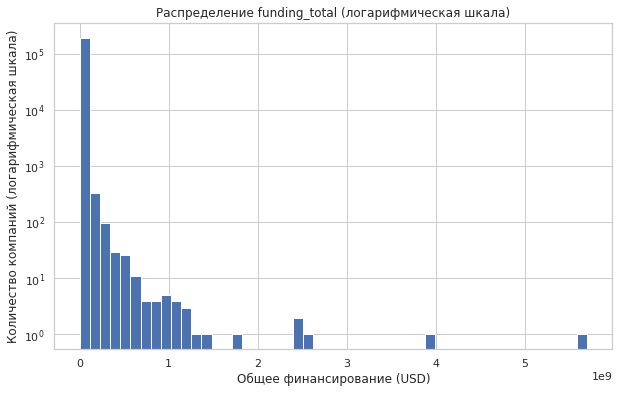

In [58]:
# Гистограмма с логарифмической шкалой
plt.figure(figsize=(10, 6))
plt.hist(funding_data, bins=50, log=True)
plt.title('Распределение funding_total (логарифмическая шкала)')
plt.xlabel('Общее финансирование (USD)')
plt.ylabel('Количество компаний (логарифмическая шкала)')
plt.show()

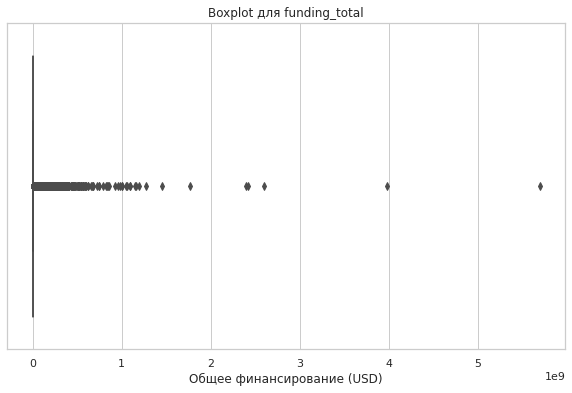

In [59]:
# Ящик с усами
plt.figure(figsize=(10, 6))
sns.boxplot(x=funding_data)
plt.title('Boxplot для funding_total')
plt.xlabel('Общее финансирование (USD)')
plt.show()

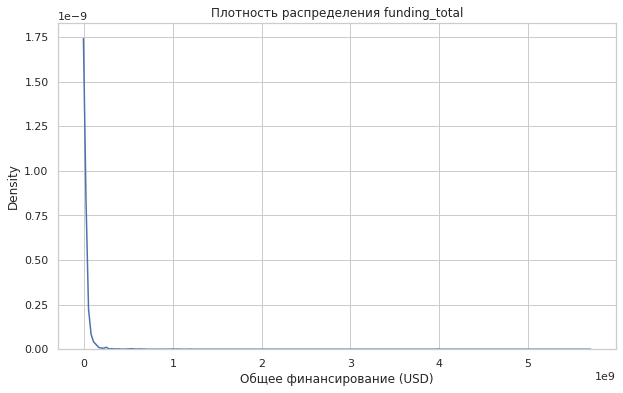

In [60]:
# KDE
plt.figure(figsize=(10, 6))
sns.kdeplot(funding_data)
plt.title('Плотность распределения funding_total')
plt.xlabel('Общее финансирование (USD)')
plt.show()

По всем трем графикам видно, что большинство компаний имеет малое финансирование, "хвост" выбросов, означающий выбивающиеся компании, очень длинный и он тянется вправо.

In [61]:
# Вычисление выбросов с помощью IQR
Q1 = funding_data.quantile(0.25)
Q3 = funding_data.quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = funding_data[(funding_data < lower_bound) | (funding_data > upper_bound)]
display(f"Количество выбросов: {len(outliers)}")
display(f"Границы для выбросов: <{lower_bound:.2f} или >{upper_bound:.2f}")

'Количество выбросов: 27874'

'Границы для выбросов: <0.00 или >0.00'

Как видно по графикам, у большинства компаний общее финансирование стремится к нулю. Значения, превышающие эту цифру, уже фиксируются как выбросы.

Касательно применимости данных можно отметить, что наиболее применимым в этом наборе для определения наиболее типичных значений является медиана. Также полезной может быть мода - судя по графику KDE, она должна быть наиболее близка медиане из всех метрик. Среднее арифметическое не применимо для такого рода оценки, поскольку из-за скоса оно имеет слишком большое значение.


### 3.3. Куплены забесплатно?

In [62]:
# Выборка компаний с status == 'acquired' и funding_total > 0
acquired_companies = companies[
    (companies['status'] == 'acquired') &
    (companies['funding_total'] > 0)
]

display(f"Количество компаний с status == 'acquired' и funding_total > 0: {len(acquired_companies)}")

"Количество компаний с status == 'acquired' и funding_total > 0: 2335"

Под исследование в рамках данной задачи попадает 2335 компаний из базы.

In [63]:
# Проверка pre_money_valuation в раундах для acquired компаний
acquired_rounds = company_and_rounds[
    (company_and_rounds['status'] == 'acquired') &
    (company_and_rounds['funding_round_id'].notna()) &
    (company_and_rounds['funding_total'] > 0)
][['company_id', 'name', 'funding_total', 'pre_money_valuation', 'raised_amount']]

low_valuation = acquired_rounds[acquired_rounds['pre_money_valuation'].isin([0, 1])]
display(f"Количество раундов с pre_money_valuation == 0 или 1: {len(low_valuation)}")
if len(low_valuation) > 0:
    display("Примеры раундов с pre_money_valuation == 0 или 1:")
    display(low_valuation.head())

'Количество раундов с pre_money_valuation == 0 или 1: 4603'

'Примеры раундов с pre_money_valuation == 0 или 1:'

,company_id,name,funding_total,pre_money_valuation,raised_amount
15,1001.0,FriendFeed,5000000.0,0.0,5000000.0
79,10054.0,Jumptap,121500000.0,0.0,26000000.0
80,10054.0,Jumptap,121500000.0,0.0,4000000.0
81,10054.0,Jumptap,121500000.0,0.0,17000000.0
82,10054.0,Jumptap,121500000.0,0.0,22000000.0


4 603 раунда, перед которыми компания оценивалась минимально, указывает на их возможную продажу за символическую цену. 

Теперь рассчитаем верхнюю и нижнюю границы выбросов для столбца *funding_total* в **companies** и определим, каким процентилям они соответствуют.

In [64]:
# Фильтрация непустых значений funding_total
funding_data = companies['funding_total'].dropna()

In [65]:
# Расчет квартилей и IQR
Q1 = funding_data.quantile(0.25)
Q3 = funding_data.quantile(0.75)
IQR = Q3 - Q1

# Расчет границ выбросов
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

display(f"Границы выбросов для funding_total:")
display(f"Q1 (25-й процентиль): {Q1:,.2f}")
display(f"Q3 (75-й процентиль): {Q3:,.2f}")
display(f"IQR: {IQR:,.2f}")
display(f"Нижняя граница: {lower_bound:,.2f}")
display(f"Верхняя граница: {upper_bound:,.2f}")

'Границы выбросов для funding_total:'

'Q1 (25-й процентиль): 0.00'

'Q3 (75-й процентиль): 0.00'

'IQR: 0.00'

'Нижняя граница: 0.00'

'Верхняя граница: 0.00'

In [66]:
# Подсчет выбросов
outliers = funding_data[(funding_data < lower_bound) | (funding_data > upper_bound)]
display(f"Количество выбросов: {len(outliers)}")

'Количество выбросов: 27874'

In [67]:
# Определение процентилей для границ
lower_percentile = funding_data[funding_data <= lower_bound].count() / funding_data.count() * 100
upper_percentile = funding_data[funding_data <= upper_bound].count() / funding_data.count() * 100

display(f"Процентили для границ выбросов:")
display(f"Нижняя граница соответствует ~{lower_percentile:.2f}% процентилю")
display(f"Верхняя граница соответствует ~{upper_percentile:.2f}% процентилю")

'Процентили для границ выбросов:'

'Нижняя граница соответствует ~85.82% процентилю'

'Верхняя граница соответствует ~85.82% процентилю'

В рамках задачи были выявлены 2 335 компаний, соответствующих условию status == 'acquired' и funding_total > 0. Также выявлено целых 4 603 раунда со значением pre_money_valuation == 0 или 1, что может быть связано с низкой оценкой компании перед продажей.

Были получены аномальные результаты по границам выбросов: фактически все результаты, превышающие нулевое значение, являются выбросами. В 0 укладывается 85,82% показателей по процентилю - соответственно, этот же показатель является нижней границей.


### 3.4. Цены стартапов по категориям

In [68]:
companies['category_code'].unique()

array(['web', 'games_video', 'network_hosting', 'advertising',
       'cleantech', nan, 'enterprise', 'other', 'consulting', 'mobile',
       'health', 'software', 'analytics', 'finance', 'education',
       'medical', 'manufacturing', 'biotech', 'ecommerce',
       'public_relations', 'hardware', 'search', 'news', 'government',
       'security', 'photo_video', 'travel', 'semiconductor', 'social',
       'legal', 'transportation', 'hospitality', 'sports', 'nonprofit',
       'fashion', 'messaging', 'music', 'automotive', 'design',
       'real_estate', 'local', 'nanotech', 'pets'], dtype=object)

Мы видим, что всего в базе данных содержится 43 уникальных категории стартапов. Эта информация пригодится нам для определения количества категорий в ТОПах.

In [69]:
# Сгруппируем стартапы по category_code
category_stats = acquired_companies.groupby('category_code').agg(
    median_funding=('funding_total', 'median'),
    std_funding=('funding_total', 'std'),
    company_count=('company_id', 'count')
).reset_index()

In [70]:
# Отфильтруем категории с достаточным для анализа количеством компаний (для удобства возьмем >= 10)
category_stats = category_stats[category_stats['company_count'] >= 10]

In [71]:
# Выделим топ-5 категорий по медиане
top_median = category_stats.sort_values('median_funding', ascending=False).head(5)
display("Топ-5 категорий по медиане funding_total:")
display(top_median[['category_code', 'median_funding', 'std_funding', 'company_count']])

'Топ-5 категорий по медиане funding_total:'

,category_code,median_funding,std_funding,company_count
3,biotech,23500000.0,5.166635e+07,161
18,medical,20000000.0,1.730592e+07,15
30,semiconductor,18800000.0,3.193933e+07,73
4,cleantech,17729700.0,1.583788e+08,56
13,hardware,12700000.0,1.747432e+07,58


In [72]:
# Выделим топ-5 категорий по стандартному отклонению
top_std = category_stats.sort_values('std_funding', ascending=False).head(5)
display("Топ-5 категорий по стандартному отклонению funding_total:")
display(top_std[['category_code', 'median_funding', 'std_funding', 'company_count']])

'Топ-5 категорий по стандартному отклонению funding_total:'

,category_code,median_funding,std_funding,company_count
20,mobile,8650000.0,4.279845e+08,178
4,cleantech,17729700.0,1.583788e+08,56
14,health,9725000.0,7.702524e+07,16
11,finance,6000000.0,5.386485e+07,13
3,biotech,23500000.0,5.166635e+07,161


In [73]:
# Выделим категории с одновременно высокой медианой и разбросом
# Определяем пороги: выше 75-го процентиля для медианы и std
median_threshold = category_stats['median_funding'].quantile(0.75)
std_threshold = category_stats['std_funding'].quantile(0.75)

high_value_high_risk = category_stats[
    (category_stats['median_funding'] >= median_threshold) &
    (category_stats['std_funding'] >= std_threshold)
]

display("Категории с высокой медианой и высоким разбросом:")
display(high_value_high_risk[['category_code', 'median_funding', 'std_funding', 'company_count']])

'Категории с высокой медианой и высоким разбросом:'

,category_code,median_funding,std_funding,company_count
3,biotech,23500000.0,5.166635e+07,161
4,cleantech,17729700.0,1.583788e+08,56


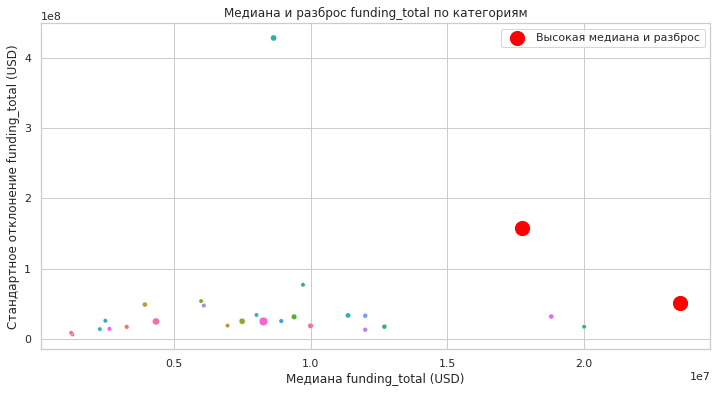

In [74]:
# Визуализируем результат
plt.figure(figsize=(12, 6))
sns.scatterplot(data=category_stats, x='median_funding', y='std_funding', size='company_count', hue='category_code', legend=False)
plt.scatter(high_value_high_risk['median_funding'], high_value_high_risk['std_funding'], c='red', s=200, label='Высокая медиана и разброс')
plt.title('Медиана и разброс funding_total по категориям')
plt.xlabel('Медиана funding_total (USD)')
plt.ylabel('Стандартное отклонение funding_total (USD)')
plt.legend()
plt.show()

Мы получили данные, что список ТОП-категорий с типично высокими ценами (по медиане) и по разбросу отличаются. По обоим критериям в топы входят 2 категории: **biotech**  и **cleantech**. Две точки, обозначающие эти категории, можно видеть на графике (толстые красные точки).
 
В ТОП-5 по типично высоким ценам также входят категории medical, semiconductor и hardware, а в ТОП-5 по разбросу - mobile, health и finance.

**ПОЧЕМУ БЫЛ ВЫБРАН ИМЕННО ТАКОЙ СПОСОБ ПОДСЧЕТА И ТАКОЕ КОЛИЧЕСТВО КАТЕГОРИЙ В ТОПЕ?**

1. Топ-5 позволяет выделить наиболее значимые категории, не перегружая лишней информацией. В списке из ТОП-3 можно упустить важные категории, а условный ТОП-10 усложнит возможности интерпретации.

2. ТОП-5 охватывает около 12% от общего количества категорий (43) - это достаточно репрезентативная выборка для анализа.

3. Выбор медианы для анализа обусловлен тем, что проведенное ранее исследование выявило серьезный перекос данных вправо из-за выбросов. Медиана является наиболее устойчивым из стандартных показателей по отношению к выбросам, в отличие от, например, среднего арифметического.

4. Выбор стандартного отклонения для анализа обусловлен тем, что этот показатель измеряет вариабельность цен, включая влияние выбросов, что способно помочь выделить категории с высокими риском и потенциальной доходностью.

5. Порог процентиля в 75% обусловлен тем, что он позволяет выбрать наиболее "высокие" значения в категориях, но при этом не ограниченные единичными примерами из базы.

6. Фильтрация по количеству компаний, которая включила условие больше или равно 10, также позволяет отсечь категории с совсем небольшим числом стартапов, которые могли бы стать статистическим шумом.

7. Выбор в пользу точечной диаграммы позволил наглядно продемонстрировать соотношение медианы и разброса и выделить наиболее выдающиеся категории по обоим показателям. В свою очередь, выбор категорий с высокой медианой и разбросом (выше 75-го процентиля) гарантирует, что мы фокусируемся на категориях, соответствующих интересам инвесторов - т.е. высоким доходности и риску.


### 3.5. Сколько раундов продержится стартап перед покупкой

In [75]:
# Отфильтруем компании
filtered_companies = companies[
    (companies['funding_rounds'] > 0) |
    (companies['investment_rounds'] > 0) |
    (companies['status'] == 'acquired')
].drop_duplicates(subset='company_id')

display(f"Количество отфильтрованных компаний: {len(filtered_companies)}")

'Количество отфильтрованных компаний: 40747'

In [76]:
# Анализ funding_rounds
display("Описательная статистика funding_rounds:")
display(filtered_companies['funding_rounds'].describe())

'Описательная статистика funding_rounds:'

count    40747.000000
mean         1.291531
std          1.264604
min          0.000000
25%          1.000000
50%          1.000000
75%          2.000000
max         15.000000
Name: funding_rounds, dtype: float64

In [77]:
# Выделим уникальные значения
display("Уникальные значения funding_rounds:")
display(sorted(filtered_companies['funding_rounds'].dropna().unique()))

'Уникальные значения funding_rounds:'

[0.0,
 1.0,
 2.0,
 3.0,
 4.0,
 5.0,
 6.0,
 7.0,
 8.0,
 9.0,
 10.0,
 11.0,
 12.0,
 13.0,
 14.0,
 15.0]

In [78]:
# Проверим пропуски
display(f"Количество пропусков в funding_rounds: {filtered_companies['funding_rounds'].isna().sum()}")

'Количество пропусков в funding_rounds: 0'

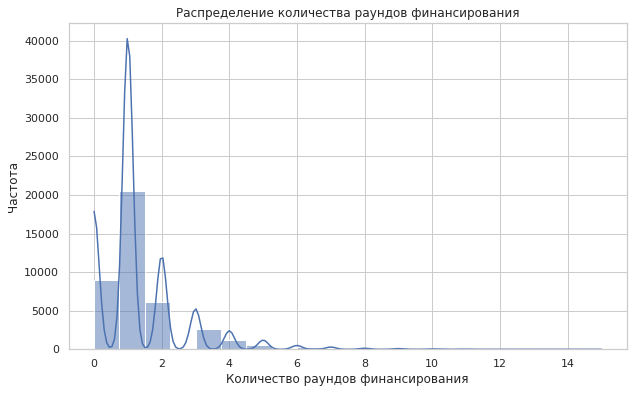

In [79]:
# ВИзуализируем распределение с помощью гистограммы и линии KDE
plt.figure(figsize=(10, 6))
sns.histplot(filtered_companies['funding_rounds'].dropna(), bins=20, kde=True)
plt.title('Распределение количества раундов финансирования')
plt.xlabel('Количество раундов финансирования')
plt.ylabel('Частота')
plt.show()

Большинство компаний (в целом, без распределения по категориям) проходит не более чем через 3 раунда финансирования (при максимуме в базе - 15). Отсутствие пропусков делает результаты анализа максимально достоверными. Далее проверим распределение по статусам стартапов.

In [80]:
# Уникальные статусы
display("Уникальные значения status:")
display(filtered_companies['status'].unique())

'Уникальные значения status:'

array(['operating', 'acquired', 'closed', 'ipo'], dtype=object)

In [81]:
# Группировка по status
status_stats = filtered_companies.groupby('status').agg(
    median_rounds=('funding_rounds', 'median'),
    mean_rounds=('funding_rounds', 'mean'),
    company_count=('company_id', 'count')
).reset_index()

display("Статистика funding_rounds по статусам:")
display(status_stats)

'Статистика funding_rounds по статусам:'

,status,median_rounds,mean_rounds,company_count
0,acquired,0.0,0.523526,9394
1,closed,1.0,1.381453,2092
2,ipo,1.0,1.934375,640
3,operating,1.0,1.522658,28621


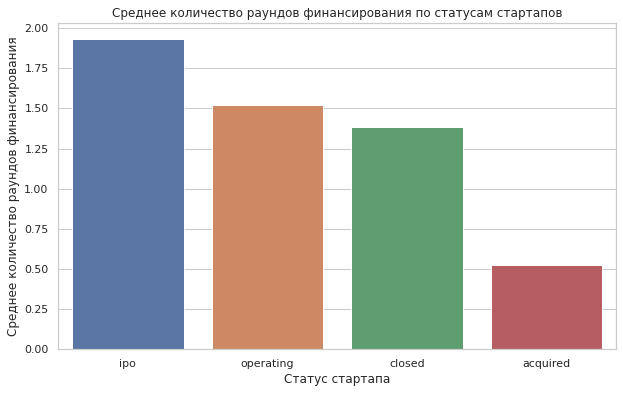

In [82]:
# Сортировка status_stats по mean_rounds в порядке убывания
status_stats_sorted = status_stats.sort_values('mean_rounds', ascending=False)
# Визуализируем результат с помощью графика: среднее количество раундов по статусам
plt.figure(figsize=(10, 6))
sns.barplot(data=status_stats_sorted, x='status', y='mean_rounds', order=status_stats_sorted['status'])
plt.title('Среднее количество раундов финансирования по статусам стартапов')
plt.xlabel('Статус стартапа')
plt.ylabel('Среднее количество раундов финансирования')
plt.show()

Медианное значение по каждому статусу, кроме acquired, равно 1. В acquired этот показатель равен 0. Эти показатели можно назвать наиболее типичными для статусов стартапов. 

По среднему количеству раундов распределение выглядит следующим образом: ipo (1,93 раунда), operating (1,52 раунда), closed (1,38 раунда) и acquired (0,52 раунда).

**Таким образом, можно сделать выводы**:

1. Стартапы с IPO и приобретением требуют больше раундов, что указывает на их капиталоемкость и потенциал.

2. Закрывшиеся стартапы имеют меньше раундов, что может быть связано с неудачами, повлекшими закрытие.

3. Действующие стартапы находятся на промежуточной стадии.

4. Инвесторам следует искать компании не более чем с 2, а лучше с 1 раундом для сделок по приобритению, в идеале - IPO.


## Шаг 4. Итоговый вывод и рекомендации


Следующие действия были совершены на этапе предобработки данных и предварительного исследования:

1. В таблице **company_and_rounds** названия столбцов были приведены к единому стилю с остальными таблицами - snake_case

2. В той же таблице содержались два столбца с одинаковым названием - *company_id*. Для избежания путаницы один из этих столбцов было принято решение переименовать.

3. Столбцы в таблицах, содержащие информацию о датах и времени, приведены к соответствующему типу данных datetime

4. Проведен анализ пропусков. Выявлены как незначительные объемы пропусков, так и серьезные недостатки данных, особенно в таблице education, что может затруднить проведение дальнейшего исследовательского анализа

5. Внутри датасетов столбцы *network_username* содержат дубли, в частности, в **company_and_rounds** их количество почти 16000. В то же время, доля пересечений между разными таблицами относительно всех уникальных network_username крайне мала.

6. Определено, что *network_username* в силу особенностей столбцов с этим названием в различных таблицах не подходит для объединения данных. В этом качестве перспективнее выглядит *company_id*, так как там однозначно идентифицируются компании и он содержится в нескольких разных датасетах.

7. Для выполнения основного анализа в разрезе отдельных компаний, на базе сущестувующих столбцов таблицы **company_and_rounds** была создана таблица **compamies** отдельно по компаниям. Отметим, что новый формат (разделение таблицы на две, на компании и раунды) соответствует предположению заказчика о более удобном хранении данных.

Выводы по итогам вопросов основного исследования:

1. У большинства компаний из базы данных общее финансирование стремится к нулю. Значения, превышающие эту цифру, уже фиксируются как выбросы. Касательно применимости данных можно отметить, что наиболее применимым в этом наборе для определения наиболее типичных значений является медиана. Также полезной может быть мода - судя по графику KDE, она должна быть наиболее близка медиане из всех метрик. Среднее арифметическое не применимо для такого рода оценки, поскольку из-за скоса оно имеет слишком большое значение.

2. Были выявлены 2 335 компаний, соответствующих условию status == 'acquired' и funding_total > 0. Также выявлено целых 4 603 раунда со значением pre_money_valuation == 0 или 1, что может быть связано с низкой оценкой компании перед продажей.

3. Были получены аномальные результаты по границам выбросов: фактически все результаты, превышающие нулевое значение, являются выбросами. В 0 укладывается 85,82% показателей по процентилю - соответственно, этот же показатель является нижней границей.

4. Мы получили данные, что список ТОП-категорий с типично высокими ценами (по медиане) и по разбросу отличаются. По обоим критериям в топы входят 2 категории: biotech и cleantech. Две точки, обозначающие эти категории, можно видеть на графике (толстые красные точки).

5. В ТОП-5 по типично высоким ценам также входят категории medical, semiconductor и hardware, а в ТОП-5 по разбросу - mobile, health и finance.

6. Медианное значение по каждому статусу, кроме acquired, равно 1. В acquired этот показатель равен 0. Эти показатели можно назвать наиболее типичными для статусов стартапов.

7. По среднему количеству раундов распределение выглядит следующим образом: ipo (1,93 раунда), operating (1,52 раунда), closed (1,38 раунда) и acquired (0,52 раунда).

**Рекомендации**

Наиболее выгодные для приобретения компании относятся к статусу IPO. В идеале следует обращать внимание на компании с совсем небольшим количеством раундов финансирования - не более 2-х и или даже всего с 1-м.